# Breast-Cancer-Detection-CNN

Breast Cancer Detection using a CNN model.

## Import Libraries

In [1]:
!pip install tensorflow-gpu==2.2.0

     |████████████████████████████████| 516.2MB 29kB/s 


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import Datasets

In [0]:
dataset = datasets.load_breast_cancer()

In [10]:
x = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
y = dataset.target
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
print("x train shape:", x_train.shape)
print("x test shape:", x_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

x train shape: (455, 30)
x test shape: (114, 30)
y train shape: (455,)
y test shape: (114,)


## Data Preprocessing

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
x_train = x_train.reshape(455, 30, 1)
x_test = x_test.reshape(114, 30, 1)

## Train Model

In [35]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_8 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1792)             

In [36]:
epochs = 90
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/90
15/15 [==============================] - 0s 18ms/step - loss: 1.0364 - accuracy: 0.6044 - val_loss: 0.6532 - val_accuracy: 0.8246
Epoch 2/90
15/15 [==============================] - 0s 9ms/step - loss: 0.6710 - accuracy: 0.7209 - val_loss: 0.5797 - val_accuracy: 0.8860
Epoch 3/90
15/15 [==============================] - 0s 10ms/step - loss: 0.5475 - accuracy: 0.7604 - val_loss: 0.5248 - val_accuracy: 0.8772
Epoch 4/90
15/15 [==============================] - 0s 9ms/step - loss: 0.3802 - accuracy: 0.8527 - val_loss: 0.4811 - val_accuracy: 0.9035
Epoch 5/90
15/15 [==============================] - 0s 9ms/step - loss: 0.3008 - accuracy: 0.8835 - val_loss: 0.4437 - val_accuracy: 0.9035
Epoch 6/90
15/15 [==============================] - 0s 9ms/step - loss: 0.3534 - accuracy: 0.8549 - val_loss: 0.4125 - val_accuracy: 0.9035
Epoch 7/90
15/15 [==============================] - 0s 9ms/step - loss: 0.2719 - accuracy: 0.8945 - val_loss: 0.3834 - val_accuracy: 0.9123
Epoch 8/90
15/15 [

## Plot Learning Curve 

In [0]:
def plot_learning_curve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Accuracy Model')
  plt.ylabel('Accuracy')
  plt.xlabel("Epoch")
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Loss Model')
  plt.ylabel('Loss')
  plt.xlabel("Epoch")
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show() 

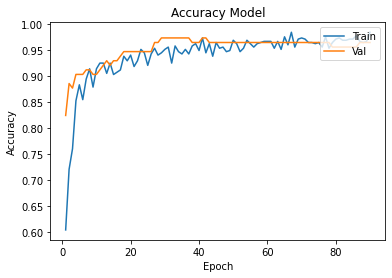

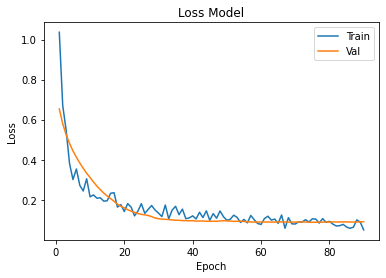

In [38]:
plot_learning_curve(history, epochs)